# Cleaning data
## Step 1: Duplicate Removal
## Step 2: Privacy Filter


# Duplicate Removal

In [1]:
# modules
# import basics
import os
import re
import csv
import json
import time
# import requests
import pandas as pd

from time import sleep
from datetime import datetime, timedelta 
from dotenv import load_dotenv
#from requests.auth import HTTPBasicAuth

# text processing dependencies
# from bs4 import BeautifulSoup
# from boilerpy3 import extractors

# mysql dependencies
import mysql.connector

In [2]:
# initialize variables

load_dotenv(override=True)

# mysql credentials
PASSWORD = os.getenv("PASSWORD")
USER = os.getenv("USER")

In [3]:
# connect to db
import mysql.connector

mydb = mysql.connector.connect(
  host="127.0.0.1",
  user=USER,
  password=PASSWORD,
  database="mpp21"
)

mycursor = mydb.cursor()

In [4]:
# db methods
def select_content(curs, db):
    
    curs.execute("SELECT article_id, title, date FROM articles WHERE newspaper = 'NYT'") 

    all_titles = []
    result = curs.fetchall()
    for r in result:
        all_titles.append(r[0])
    
    return all_titles

In [5]:
# read db 

In [6]:
# analyze time period to extract timeframe considered for duplicates (e.g., 1 week, 1 month)
# and to extract threshold distribution per week/month

In [7]:
# read newspaper info 

newspapers = {}

with open('./newspapers-collected.csv', 'r') as f:
        reader = csv.reader(f)
        for r in reader:
            newspapers[r[0]] = r[1]

In [8]:
newspapers.keys()

dict_keys(['TG', 'AFR', 'TDP', 'NYT', 'NZH', 'USA', 'TS', 'SMH', 'DT', 'GM'])

In [9]:
# db methods
def select_within_range(curs, db, n):
    
    curs.execute("SELECT article_id, title, date FROM articles WHERE newspaper = '" + n + "' AND date >= '" + timeframe_start + "' AND date <= '" + timeframe_end + "'") 
    
    arts = {}
    result = curs.fetchall()
    for r in result:
        arts[r[0]] = {
            "title": r[1],
            "date": r[2]
        }
    
    return arts

## WEEK WISE SIMILARITIES

In [10]:
timeframe_start = '2018-01-01'#datetime.strftime(datetime(2018,1,1), '%Y-%m-%d')
timeframe_end = '2018-06-30'#datetime.strftime(datetime(2018,3,1), '%Y-%m-%d')

In [11]:
# get articles for newspaper n in range

articles = {}
for n in newspapers.keys():
    articles[n] = {}
    

In [12]:
for n in articles.keys():
    articles[n] = select_within_range(mycursor, mydb, n)

In [13]:
# for i in articles.keys():
#     print(i, "\t",len(articles[i]))

In [14]:
#test = select_within_range(mycursor, mydb, "AFR")

In [15]:
#df = pd.DataFrame.from_dict(articles["TG"]).T

In [16]:
weeks = []

timeframe_start = datetime.date(datetime(2018,1,1))
timeframe_end = datetime.date(datetime(2018,6,30))

dt = timeframe_start

while dt <= timeframe_end:
    
    weeks.append((dt, dt + timedelta(days=6))) # (start, end)
    dt += timedelta(days=7) # move to next week

In [17]:
group = {}

ctr = 1 # week

for w in range(len(weeks)):
    group["week_" +str(w + 1) + ""] = []
          
for week in weeks:
   # group["week_" + str(ctr)+ ""] = []
    for i in articles["TG"].keys():

        if articles["TG"][i]["date"] >= week[0] and articles["TG"][i]["date"] <= week[1]:
            group["week_" +str(ctr) + ""].append(articles["TG"][i])
    ctr += 1

In [18]:
titles = {}
for w in group.keys():
    titles[w] = []
    for entry in group[w]:
        titles[w].append(entry["title"])

In [19]:
# for w in titles:
#     print(len(titles[w]), "vs", len(set(titles[w])))

In [20]:
#df.sort_values(by=['date'])

In [21]:
#titles["week_1"]

In [22]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import numpy as np

In [33]:
def get_cosine_similarity_week(docs): # docs = list of titles

    # Create the Document Term Matrix
    count_vectorizer = CountVectorizer(stop_words='english')
    count_vectorizer = CountVectorizer()
    sparse_matrix = count_vectorizer.fit_transform(docs)

    return cosine_similarity(sparse_matrix, sparse_matrix)


def display_cosine_similarity_results(res):
    
    results = []
    for r in res.flatten():
        results.append(round(r, 3))
        
        
    return sorted(results)#sorted(set(results))

def get_cosine_similarity_month(docs): # docs = list of titles

    # Create the Document Term Matrix
    count_vectorizer = CountVectorizer(stop_words='english')
    count_vectorizer = CountVectorizer()
    sparse_matrix = count_vectorizer.fit_transform(docs)

    return cosine_similarity(sparse_matrix, sparse_matrix)

In [34]:
aggregated_similarities = []

for w in titles.keys():
    result = get_cosine_similarity_week(titles[w])
    results = display_cosine_similarity_results(result) # returned as set

    aggregated_similarities.append(results)
#     fig,ax = plt.subplots(1,1)
#     a = results
#     ax.hist(a, bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#     ax.set_title("histogram of cosine similarity " + w + "")
#     ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
#     ax.set_xlabel('cosine similarity index')
#     ax.set_ylabel('values within range')
#     plt.show()
    #results

In [35]:
# aggregated


In [38]:
def display_aggregated_similarity(agg):
    aggregated = []

    for i in agg:
        for j in i:
            aggregated.append(j)

   # aggregated = set(aggregated)
    
    fig,ax = plt.subplots(1,1)
    a = list(aggregated)
    ax.hist(a, bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    ax.set_title("histogram of aggregated cosine similarity for 6 months (TG)")
    ax.set_xticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
    ax.set_xlabel('cosine similarity index')
    ax.set_ylabel('values within range')
    plt.show()
    
    return

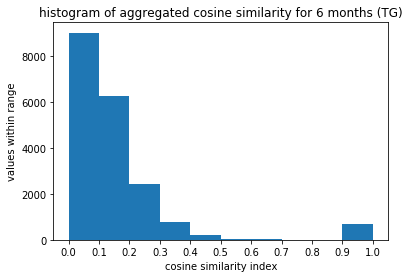

In [39]:
display_aggregated_similarity(aggregated_similarities)

## MONTH WISE SIMILARITIES

In [153]:
months = [
    (datetime.date(datetime(2018,1,1)), datetime.date(datetime(2018,1,31))),
     (datetime.date(datetime(2018,2,1)), datetime.date(datetime(2018,2,28))),
     (datetime.date(datetime(2018,3,1)), datetime.date(datetime(2018,3,31))),
     (datetime.date(datetime(2018,4,1)), datetime.date(datetime(2018,4,30))),
     (datetime.date(datetime(2018,5,1)), datetime.date(datetime(2018,5,31))),
     (datetime.date(datetime(2018,6,1)), datetime.date(datetime(2018,6,30))),   
    
]


In [154]:
group_months = {}

ctr = 1 # month

for m in range(len(months)):
    group_months["month_" +str(m + 1) + ""] = []
          
for month in months:
   # group["week_" + str(ctr)+ ""] = []
    for i in articles["TG"].keys():

        if articles["TG"][i]["date"] >= month[0] and articles["TG"][i]["date"] <= month[1]:
            group_months["month_" +str(ctr) + ""].append(articles["TG"][i])
    ctr += 1

In [161]:
titles_months = {}
for m in group_months.keys():
    titles_months[m] = []
    for entry in group_months[m]:
        titles_months[m].append(entry["title"])

In [165]:
aggregated_similarities_months = []

for m in titles_months.keys():
    result = get_cosine_similarity_month(titles_months[m])
    results = display_cosine_similarity_results(result) # returned as set

    aggregated_similarities_months.append(results)

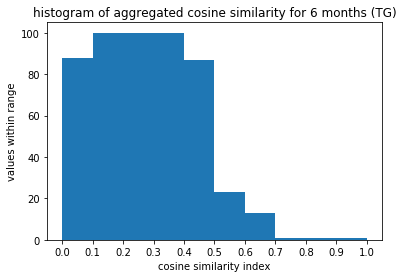

In [168]:
display_aggregated_similarity(aggregated_similarities_months)

In [71]:
#sorted(titles["week_7"])

In [67]:
def sim_sentences(a, b):
    docs = [a, b]
    
    # Create the Document Term Matrix
    count_vectorizer = CountVectorizer(stop_words='english')
    count_vectorizer = CountVectorizer()
    sparse_matrix = count_vectorizer.fit_transform(docs)

    return cosine_similarity(sparse_matrix, sparse_matrix)

In [69]:
x = "Barnaby Joyce 'gave up his right to privacy', John Hewson tells Q&A"
y = "Barnaby Joyce 'gave up his right to privacy', John Hewson tells Q&A;Former Liberal leader says deputy PM should have gone public about his marriage breakdown sooner"
res = sim_sentences(x, y)
res

array([[1.        , 0.68376346],
       [0.68376346, 1.        ]])

In [60]:
day = '2021-01-01'
dt = datetime.strptime(day, '%Y-%m-%d')
start = dt - timedelta(days=dt.weekday())
end = start + timedelta(days=6)
print(start)
print(end)


2020-12-28 00:00:00
2021-01-03 00:00:00


In [74]:
date_start = date_start + timedelta(days=1)

In [75]:
date_start

datetime.datetime(2018, 1, 3, 0, 0)

In [70]:
week_ranges = []



date_start = datetime.strptime(timeframe_start, '%Y-%m-%d')

#while date_start < timeframe_end:
    

In [ ]:
def get_weekly_duplicates():
    
    
def get_monthly_duplicates():
    

In [ ]:
# for each newspaper get the monthly and weekly duplicate rates & thresholds

## Select articles by newspaper and by timeframe, starting with 01-01-2010 (or 2011)


In [36]:
p1 = "New Privacy regulation is set to launch this month"

p2 = "GDPR regulates companies abuse of private data"

p3 = "Facebook threatens your privacy"
p4 = "New Privacy regulation to launch this month"

documents = [p1, p2, p3, p4]

In [37]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['p1', 'p2', 'p3', 'p4'])
df

,abuse,companies,data,facebook,gdpr,is,launch,month,new,of,privacy,private,regulates,regulation,set,this,threatens,to,your
p1,0,0,0,0,0,1,1,1,1,0,1,0,0,1,1,1,0,1,0
p2,1,1,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0
p3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1
p4,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,0,1,0


In [40]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
#print(cosine_similarity(df, df))

print(cosine_similarity(sparse_matrix, sparse_matrix))

[[1.         0.         0.16666667 0.8819171 ]
 [0.         1.         0.         0.        ]
 [0.16666667 0.         1.         0.18898224]
 [0.8819171  0.         0.18898224 1.        ]]


In [23]:
# 2-3 [week/month] intervals for each newspaper
# manually inspect articles to adjust the threshold
# aggregate over all results and get median/average lower bound (?) on cosine threshold

In [24]:
print(sorted(cosine_similarity(df, df)[0]))

[0.0, 0.16666666666666666, 0.8819171036881966, 0.9999999999999997]


In [31]:
sorted(cosine_similarity(df, df).flatten())

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.16666666666666666,
 0.16666666666666666,
 0.1889822365046136,
 0.1889822365046136,
 0.8819171036881966,
 0.8819171036881966,
 0.9999999999999997,
 0.9999999999999997,
 0.9999999999999997,
 1.0]